In [2]:
"""
this jupyter is used for analyzing and drawing the topics & sentiments inferred by OneModel using 2 months vaccine-related tweets 
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from cycler import cycler
# Set the color cycle for colorblindness
# The color cycle is suggested from https://gist.github.com/thriveth/8560036
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
custom_cycler = (cycler(color=CB_color_cycle))

# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

c:\users\michal\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 0. Importe Dated Tweets with Max Topic Column

In [1]:
concat_dfs = pd.read_pickle("../corpora/distinct_tweets/dated_distinct_tweets_dtm.pickle")

NameError: name 'pd' is not defined

In [3]:
concat_dfs =  concat_dfs.drop(["index"], axis=1)
concat_dfs

,max_topic,id_str,Date
0,13,1339309149868396549,2020-12-16
1,17,1338948494808248322,2020-12-15
2,0,1339052493163073537,2020-12-16
3,38,1339309148102647808,2020-12-16
4,41,1338935576863633417,2020-12-15
...,...,...,...
1960736,0,1360718993145925635,2021-02-13
1960737,25,1360718991774216193,2021-02-13
1960738,9,1360718994207039489,2021-02-13
1960739,13,1360719007108665347,2021-02-13


In [ ]:
# concat_dfs.reset_index()
# concat_dfs = concat_dfs.set_index('Date')
# concat_dfs.index


In [ ]:
# daily_counts = concat_dfs.groupby("Date").size().loc["2020-12-16":"2021-02-13"]
# daily_counts.columns = ['count']
# daily_counts = daily_counts.reset_index()
# daily_counts = daily_counts.set_index('Date')

## a. Count topic ratio in total (across 8 weeks)

In [4]:
topic_counts = concat_dfs['max_topic'].value_counts()
for topic_idx in range(0, 50):
    print("{:.2%}".format(topic_counts[topic_idx]/concat_dfs.shape[0]))

8.68%
0.69%
2.45%
1.10%
2.54%
1.80%
1.26%
2.06%
1.82%
6.79%
0.89%
0.44%
1.98%
8.28%
1.79%
1.05%
0.35%
1.69%
1.85%
0.83%
1.13%
3.68%
0.53%
0.32%
0.81%
7.47%
2.93%
3.07%
1.19%
0.40%
1.66%
2.50%
0.55%
1.53%
2.24%
0.53%
2.19%
0.29%
1.98%
1.79%
1.44%
1.53%
1.48%
1.16%
1.20%
3.15%
2.38%
1.44%
0.92%
0.16%


In [5]:
def count_maxtopics_per_day(df_max):
    """ This function is used to count topics per day for later drawing
    """
    # groupby [date, top_topics] aggregate by count(id_str)
    max_counts = df_max.groupby(['Date', 'max_topic']).agg({'id_str' : 'count'}).reset_index()
    max_counts.columns = ['Date', 'topic_id', 'max_count']

    # Count the number of individual documents per day
    total_docs = df_max[['Date', 'id_str']].groupby('Date').agg({'id_str' : 'count'}).reset_index()
    total_docs.columns = ['Date', 'total_docs']

    # Combine the two dataframes
    max_counts = max_counts.merge(total_docs, on='Date', how='left')
    # Create a new column with the count per topic divided by the total docs per day
    # Normalize
    max_counts['prevalence'] = max_counts['max_count']/max_counts['total_docs']

    # pivot to wide format
    max_counts = max_counts[['Date', 'topic_id', 'prevalence']].pivot(index='Date',\
                                                                    columns='topic_id',\
                                                                    values='prevalence').fillna(0)

    max_counts.index = pd.to_datetime(max_counts.index)
    return max_counts

In [6]:
%%time
max_counts = count_maxtopics_per_day(concat_dfs)

CPU times: user 843 ms, sys: 127 ms, total: 970 ms
Wall time: 968 ms


In [7]:
topic_label_dict = {0: "Vaccination of Frontline Workers",
13: "Access to Vaccines - Signing Up Online",
9: "South African Variant",
21: "Biden Stimulus Plan",
45: "mRNA vaccines",
27: "Complaints about pharm company profits",
26: "Vaccine Conspiracy Theories online",
4: "Trials in non mRNA vaccines",
31: "Vaccine distribution in Canada",
2: "Concerns about supply to reach heard immunity by summer",
36: "Genetic concerns about vaccines and kids",
7: "Low distribution of AstraZeneca vaccine"}

topic_reorder_dict = {0:1,
13:2,
9:3,
21:4,
45:5,
27:6,
26:7,
4:8,
31:9,
2:10,
36:11,
7:12}

# 1 Draw Topic Trend

### a. Plot Multiple Topics

In [8]:
phrase1 = ['0', '13', '9', '21', '45', '27']
phrase2 = ['26', '4', '31', '2', '36', '7']

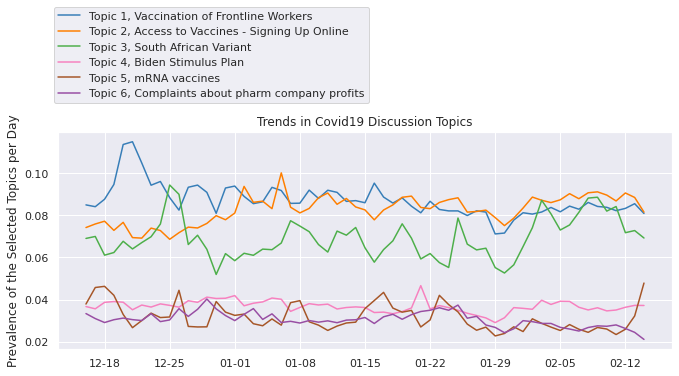

In [13]:
START = '2020-12-16'
END = '2021-02-14'
fig, ax = plt.subplots()
ax.set_prop_cycle(custom_cycler) # apply color cycle for color-blindness
for topic_id in phrase1:
    ax.plot(max_counts.loc[START:END, int(topic_id)], label="Topic {}, {}".format(topic_reorder_dict[int(topic_id)], topic_label_dict[int(topic_id)]))
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form) 
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.legend(loc=9, bbox_to_anchor=(0.25, 1.6))
    ax.set_ylabel('Prevalence of the Selected Topics per Day')
    ax.set_title('Trends in Covid19 Discussion Topics')
plt.savefig('../images/Topic-Trends-Phrase1.png', bbox_inches = 'tight', dpi=300)

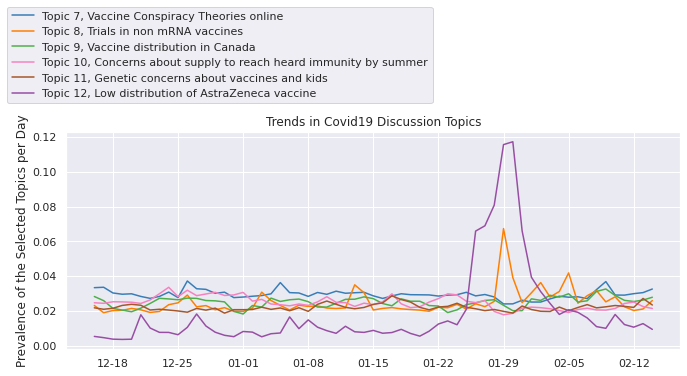

In [15]:
START = '2020-12-16'
END = '2021-02-14'
fig, ax = plt.subplots()
ax.set_prop_cycle(custom_cycler) # apply color cycle for color-blindness
for topic_id in phrase2:
    ax.plot(max_counts.loc[START:END, int(topic_id)], label="Topic {}, {}".format(topic_reorder_dict[int(topic_id)], topic_label_dict[int(topic_id)]))
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form) 
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.legend(loc=9, bbox_to_anchor=(0.25, 1.6))
    ax.set_ylabel('Prevalence of the Selected Topics per Day')
    ax.set_title('Trends in Covid19 Discussion Topics')
plt.savefig('../images/Topic-Trends-Phrase2.png', bbox_inches = 'tight', dpi=300)

### b. Plot a Single Topic

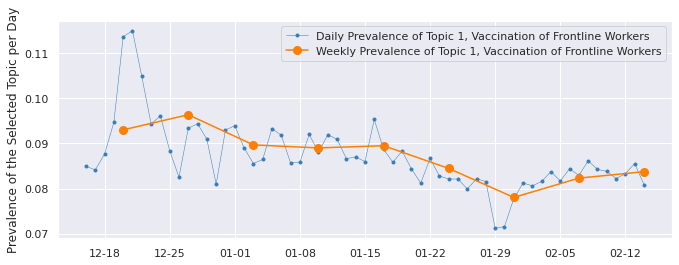

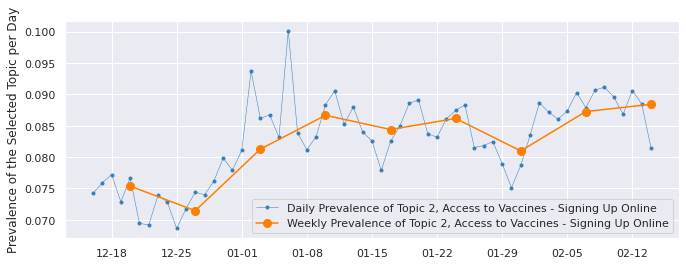

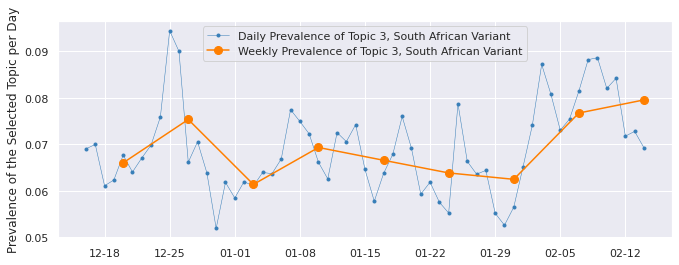

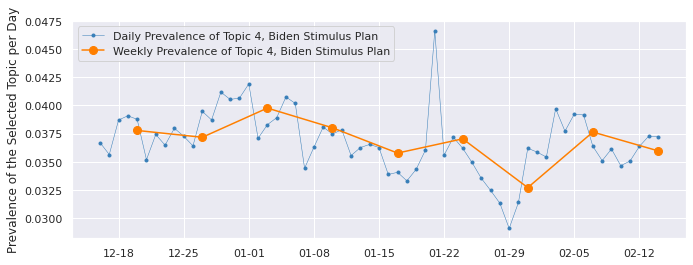

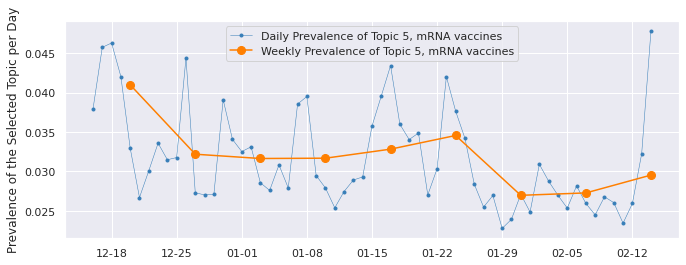

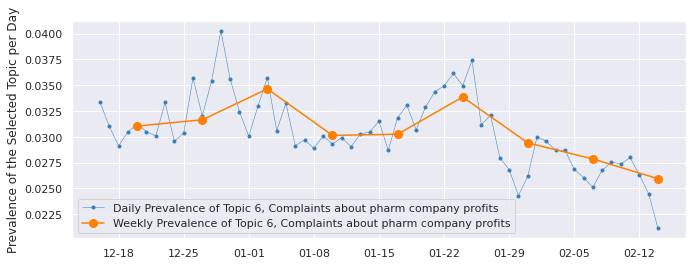

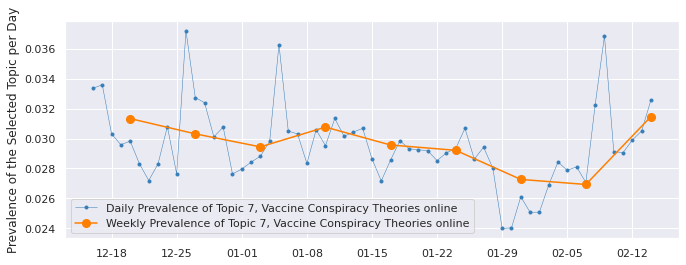

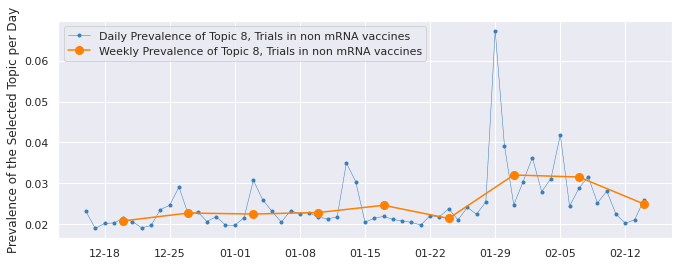

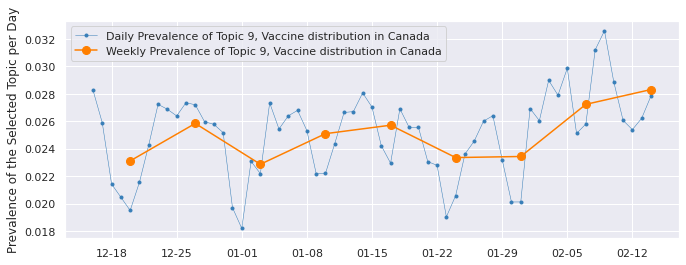

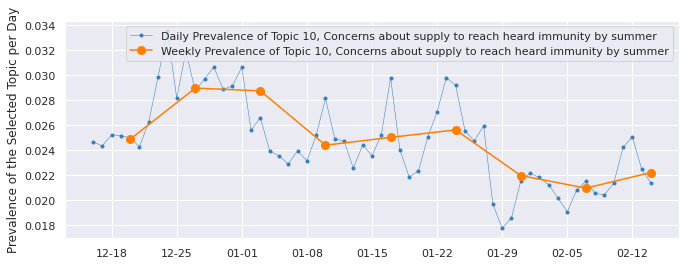

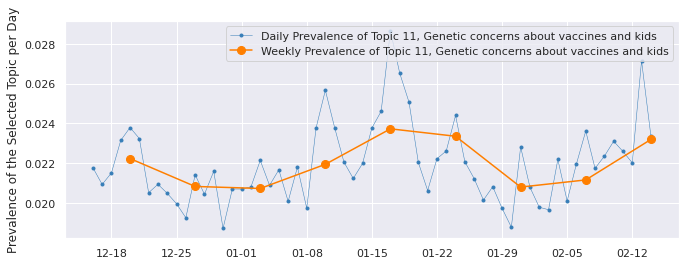

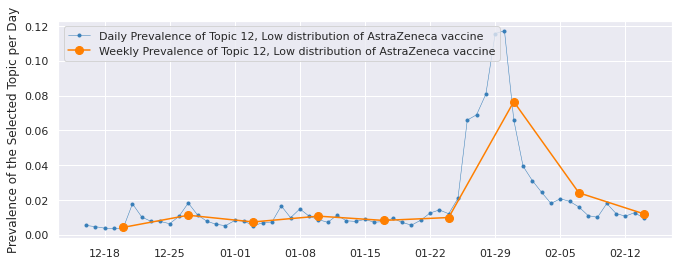

In [14]:
START = '2020-12-16'
END = '2021-02-14'
# topic_id = 4
for topic_id in phrase1+phrase2:
    # Plot daily and weekly resampled time series together
    fig, ax = plt.subplots()
    ax.set_prop_cycle(custom_cycler) # apply color cycle for color-blindness
    ax.plot(max_counts.loc[START:END, int(topic_id)],
    marker='.', linestyle='-', linewidth=0.5, label='Daily Prevalence of Topic {}, {}'.format(topic_reorder_dict[int(topic_id)], topic_label_dict[int(topic_id)]))
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form) 
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.plot(max_counts.loc[START:END, int(topic_id)].resample('W').mean(),
    marker='o', markersize=8, linestyle='-', label='Weekly Prevalence of Topic {}, {}'.format(topic_reorder_dict[int(topic_id)], topic_label_dict[int(topic_id)]))
    ax.set_ylabel('Prevalence of the Selected Topic per Day')
    ax.legend()
    plt.savefig('../images/Trends-of-Topic-{}.png'.format(topic_reorder_dict[int(topic_id)]), dpi=300)